In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(Measurement.date).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()


[('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-09-01',),
 ('2016-09-01',),
 ('2016-09-01',),
 ('2016-09

In [13]:
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [14]:
# Perform a query to retrieve the data and precipitation scores
result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()
result


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
combo_data = []
for date,prcp in result:
        weather_dict = {}
        weather_dict["date"] = date
        weather_dict["prcp"] = prcp
        combo_data.append(weather_dict)


combo_df = pd.DataFrame(combo_data)
combo_df= combo_df.set_index('date')
combo_df


,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [17]:
# Sort the dataframe by date
combo_df = combo_df.sort_index(ascending=True)
combo_df


,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


Text(0, 0.5, 'Percipitation')

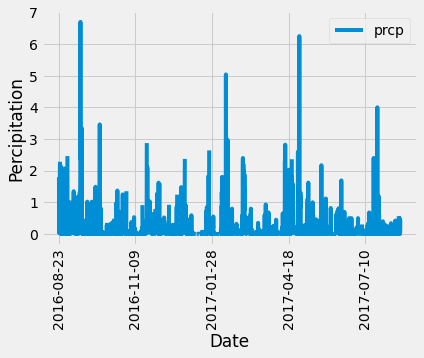

In [18]:
# Use Pandas Plotting with Matplotlib to plot the date
# Plot the Results in a Matplotlib bar chart
combo_df.plot()
plt.xticks(rotation =90)
plt.xlabel('Date')
plt.ylabel('Percipitation')

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sum_stat = combo_df.agg(['mean','median','var','std','sem'])["prcp"]
sum_stat

mean      0.177279
median    0.020000
var       0.212696
std       0.461190
sem       0.010259
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number stations in the dataset
total_station = session.query(Station).distinct().count()
print(total_station)


9


In [27]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(active_station)


[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [37]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_station = session.query( 
        func.min(Measurement.tobs),
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs))\
        .filter(Measurement.station == 'USC00519281').all()

temp_station


[(54.0, 85.0, 71.66378066378067)]

<AxesSubplot:ylabel='Frequency'>

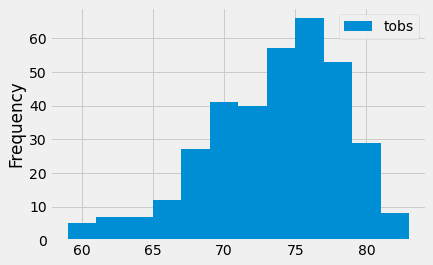

In [40]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_obs= session.query(Measurement.tobs)\
    .filter(Measurement.station == 'USC00519281')\
    .filter(Measurement.date >= year_ago).all()

year_obs_df= pd.DataFrame(year_obs)
year_obs_df.plot.hist(bins = 12)



# Close session

In [ ]:
# Close Session
session.close()